In [1]:
#CELDA 1: Cargamos el dataset unificado
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

#Mostramos los graficos generados por matploblib dentro de la celda
%matplotlib inline  

%run 00_setup.ipynb

from src.config.rutas import RUTA_DATASET

dt = pd.read_csv(RUTA_DATASET)
dt.head()       #Se muestra las 5 primeras filas

,texto,label,vector,fuente,id
0,Moby Pub Quiz.Win a £100 High Street prize if ...,1,sms,mendeley,0
1,https://www.documenters.org,0,url,phiusiil,1
2,scan system adware wrongful 6130320948821283 c...,1,email,kaggle_email,2
3,mit student thesis writeups hi vince krishna t...,0,email,kaggle_email,3
4,https://swn9klhal.web.app/,1,url,phiusiil,4


In [2]:
#CELDA 2: Informacion general del dataset

dt.info()       #Con esto se muestra un resumen estructural del dataset
dt.describe(include="all")      #Se genera estadisitcas descriptivas de todas las columnas con el include="all"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16127 entries, 0 to 16126
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   texto   16127 non-null  object
 1   label   16127 non-null  int64 
 2   vector  16127 non-null  object
 3   fuente  16127 non-null  object
 4   id      16127 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 630.1+ KB


,texto,label,vector,fuente,id
count,16127,16127.000000,16127,16127,16127.000000
unique,16108,NaN,3,3,NaN
top,U 447801259231 have a secret admirer who is lo...,NaN,url,phiusiil,NaN
freq,2,NaN,6000,6000,NaN
mean,NaN,0.441930,NaN,NaN,8063.000000
std,NaN,0.496632,NaN,NaN,4655.608231
min,NaN,0.000000,NaN,NaN,0.000000
25%,NaN,0.000000,NaN,NaN,4031.500000
50%,NaN,0.000000,NaN,NaN,8063.000000
75%,NaN,1.000000,NaN,NaN,12094.500000


Cantidad por vector:
vector
url      6000
email    6000
sms      4127
Name: count, dtype: int64

Cantidad por vector (porcentaje):
vector
url      37.204688
email    37.204688
sms      25.590624
Name: proportion, dtype: float64


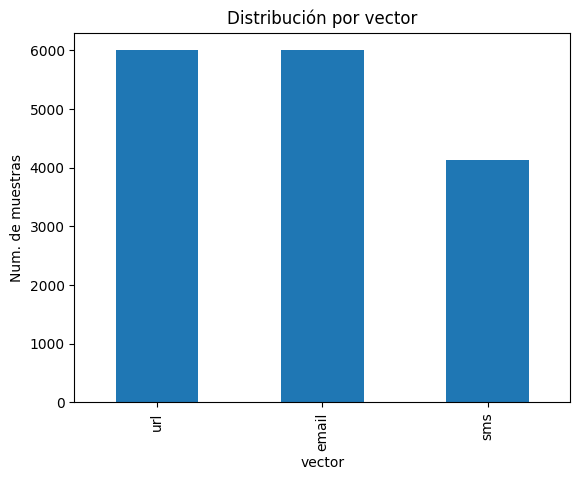

In [3]:
#CELDA 3: Cantidad por vector (URLs, Email, SMS)

print("Cantidad por vector:")
print(dt["vector"].value_counts())

print("\nCantidad por vector (porcentaje):")
print(dt["vector"].value_counts(normalize=True)*100)

#Se genera un grafico de barras donde muestra la distribucion por vector del num de muestras
dt["vector"].value_counts().plot(kind="bar", title="Distribución por vector")
plt.ylabel("Num. de muestras")
plt.show()



Cantidad por clase:
label
0    9000
1    7127
Name: count, dtype: int64

Cantidad por clase (porcentaje):
label
0    55.807032
1    44.192968
Name: proportion, dtype: float64


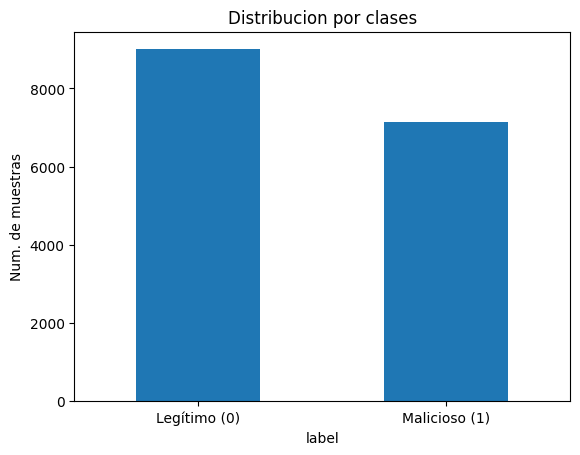

In [4]:
#CELDA 4: Cantidad por clase (legitimo vs malicioso)

print("Cantidad por clase:")
print(dt["label"].value_counts())

print("\nCantidad por clase (porcentaje):")
print(dt["label"].value_counts(normalize=True)*100)

#Lo mismo que las celda anterior pero para las clases
dt["label"].value_counts().plot(kind="bar", title="Distribucion por clases")
plt.xticks([0,1], ["Legítimo (0)", "Malicioso (1)"], rotation=0)
plt.ylabel("Num. de muestras")
plt.show()



Cantidad por vector y clase
vector  label
email   0        3000
        1        3000
sms     0        3000
        1        1127
url     0        3000
        1        3000
dtype: int64


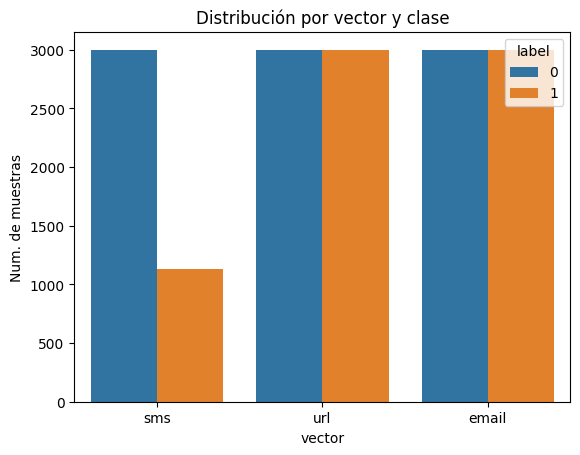

In [5]:
#CELDA 5: Cantidad por vector y clase

print("Cantidad por vector y clase")
print(dt.groupby(["vector", "label"]).size())

#Se muestra cuantas muestras pertenece a cada vector y dentro de ellas como se distribuyen las clases
sns.countplot(data=dt, x="vector", hue="label")
plt.title("Distribución por vector y clase")
plt.ylabel("Num. de muestras")
plt.show()

count     16127.000000
mean        494.787623
std        1959.619979
min           1.000000
25%          30.000000
50%          83.000000
75%         347.000000
max      115618.000000
Name: longitud, dtype: float64

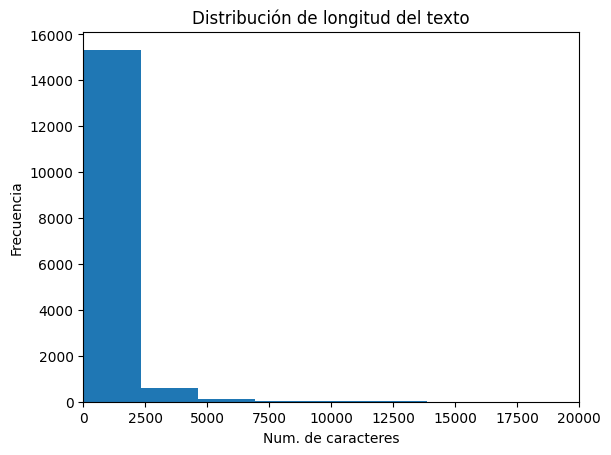

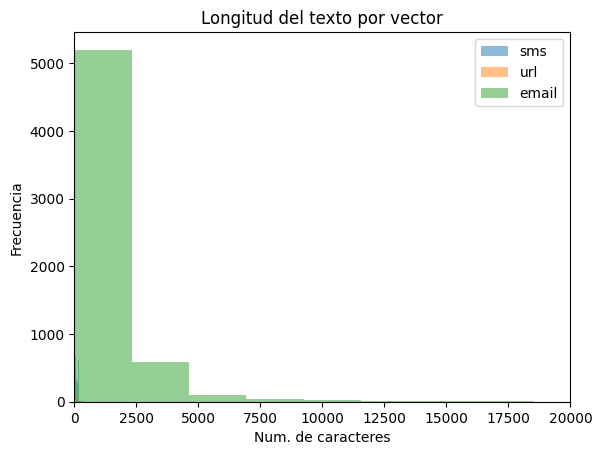

In [6]:
#CELDA 6: Longitudes del texto

#Se muestra las estadisticas de la longitud calculada en la columna texto y permite identificar anomalias.
dt["longitud"] = dt["texto"].astype(str).str.len()
display(dt["longitud"].describe())

#Histograma global de la longitud de los textos para observar si hay alguno muy largo que haga ruido
plt.hist(dt["longitud"], bins=50)
plt.title("Distribución de longitud del texto")
plt.xlabel("Num. de caracteres")
plt.ylabel("Frecuencia")
plt.xlim(0, 20000)      #Se limita el rango visual
plt.show()

#Lo mismo que el anterior pero por vector, permitiendo observar la diferencia de longitudes
for v in dt["vector"].unique():
    subset = dt[dt["vector"] == v]
    plt.hist(subset["longitud"], bins=50, alpha=0.5, label=v)

plt.legend()
plt.title("Longitud del texto por vector")
plt.xlabel("Num. de caracteres")
plt.ylabel("Frecuencia")
plt.xlim(0, 20000)
plt.show()

#S observa una gran difernecia en los textos de email sobre los otros dos.

In [7]:
#CELDA 7: Ejemplos de cada vector

#Muestra 3 ejemplos aleatorios generado con la semilla = 42 de cada vector.

print("Emails:")
display(dt[dt["vector"] == "email"].sample(3, random_state=42)[["texto", "label"]])

print("\nSMS:")
display(dt[dt["vector"] == "sms"].sample(3, random_state=42)[["texto", "label"]])

print("\nURLs:")
display(dt[dt["vector"] == "url"].sample(3, random_state=42)[["texto", "label"]])

Emails:


,texto,label
4730,contract proposals recently received e mail am...,0
10566,adger isaac jbishopaccentonsuccesscom ykxbbnup...,1
570,rock solid discount drugs save 80 every order ...,1



SMS:


,texto,label
4502,Dear 0776xxxxxxx U've been invited to XCHAT. T...,1
11514,"Ya they are well and fine., BBD(pooja) full pi...",0
7640,Tone Club: Your subs has now expired 2 re-sub ...,1



URLs:


,texto,label
4726,https://www.towtruckscarborough.com,0
10447,https://kusca.com.ar/wp-includes/widgets/webte...,1
598,https://www.cavoparadiso.gr,0


In [8]:
#CELDA 8: Checklist previo al Feature Engineering

from IPython.display import display
import pandas as pd

print("Valores nulos por columnas:")
display(dt.isna().sum())

print("\nNum. total de filas duplicadas:")
display(dt.duplicated().sum())

print("Tipo de datos por columnas:")
display(dt.dtypes)

print("\nFilas por vector:")
display(dt["vector"].value_counts())

print("\nFilas por clase:")
display(dt["label"].value_counts())

print("\nFilas por texto vacío:")
print((dt["texto"].astype(str).str.len() == 0).sum())

print("\nChecklist finalizado")

Valores nulos por columnas:


texto       0
label       0
vector      0
fuente      0
id          0
longitud    0
dtype: int64


Num. total de filas duplicadas:


np.int64(0)

Tipo de datos por columnas:


texto       object
label        int64
vector      object
fuente      object
id           int64
longitud     int64
dtype: object


Filas por vector:


vector
url      6000
email    6000
sms      4127
Name: count, dtype: int64


Filas por clase:


label
0    9000
1    7127
Name: count, dtype: int64


Filas por texto vacío:
0

Checklist finalizado
